# Data Preprocessing to make the basket

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from apyori import apriori

In [5]:
transaction_data = pd.read_excel("Online Retail.xlsx")
transaction_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
print('Dataframe dimensions:', transaction_data.shape)

Dataframe dimensions: (541909, 8)


In [7]:
transaction_data_nonulls = transaction_data[~transaction_data.isna().any(axis=1)]

In [8]:
print('Dataframe dimensions:', transaction_data_nonulls.shape)

Dataframe dimensions: (406829, 8)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

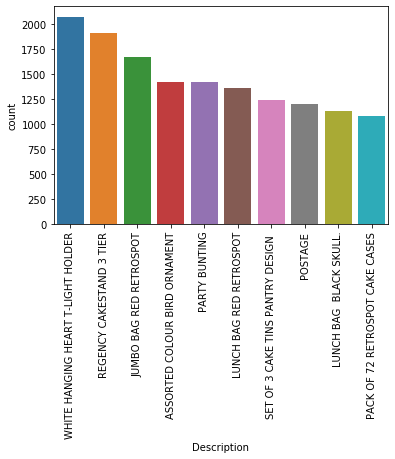

In [9]:
# Hot Items
sns.countplot(x = 'Description', data = transaction_data_nonulls, order = transaction_data_nonulls['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [10]:
sales_countrywise = transaction_data_nonulls
sales_countrywise['Total_Bill'] = transaction_data_nonulls['Quantity'] * transaction_data_nonulls['UnitPrice']
sales_countrywise = sales_countrywise.groupby(['Country'])['Total_Bill'].sum().reset_index()
sales_countrywise = sales_countrywise.sort_values('Total_Bill', ascending = False)
sales_countrywise

C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Total_Bill
35,United Kingdom,6.767873e+06
23,Netherlands,2.846615e+05
10,EIRE,2.502852e+05
14,Germany,2.216982e+05
13,France,1.967128e+05
0,Australia,1.370773e+05
32,Switzerland,5.573940e+04
30,Spain,5.477458e+04
3,Belgium,4.091096e+04
31,Sweden,3.659591e+04


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

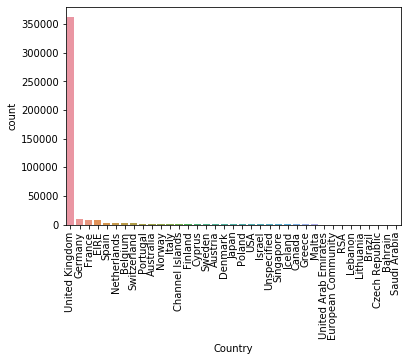

In [11]:
# Choosing countries
sns.countplot(x = 'Country', data = transaction_data_nonulls, order = transaction_data_nonulls['Country'].value_counts().index)
plt.xticks(rotation=90)

C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


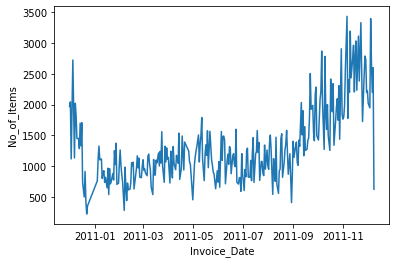

In [12]:
transaction_data_nonulls['Invoice_Date_Normalized'] = transaction_data_nonulls['InvoiceDate'].dt.normalize()
items_sold_daily = transaction_data_nonulls['Invoice_Date_Normalized'].value_counts().reset_index()
items_sold_daily = items_sold_daily.rename(columns={"index": "Invoice_Date", "Invoice_Date_Normalized": "No_of_Items"})
sns.lineplot(x="Invoice_Date", y="No_of_Items", data=items_sold_daily)

In [13]:
transaction_basket_per_invoice = transaction_data_nonulls.groupby(['InvoiceNo','Invoice_Date_Normalized'])['Description'].apply(','.join).reset_index()
transaction_basket_per_invoice.head()

,InvoiceNo,Invoice_Date_Normalized,Description
0,536365,2010-12-01,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
1,536366,2010-12-01,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
2,536367,2010-12-01,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
3,536368,2010-12-01,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
4,536369,2010-12-01,BATH BUILDING BLOCK WORD


In [14]:
transaction_baskets = pd.DataFrame(transaction_basket_per_invoice['Description'])
transaction_baskets.head()

,Description
0,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
1,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
2,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
3,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
4,BATH BUILDING BLOCK WORD


In [15]:
transaction_baskets.to_csv('transaction_basket.csv' , sep = ',' )

# Implementation of Apriori Algorithm 

In [16]:
def subset_data(country):
    return transaction_data_nonulls[transaction_data_nonulls['Country'] == country]

In [17]:
transaction_uk = subset_data('United Kingdom')
transaction_ge = subset_data('Germany')
transaction_fr = subset_data('France')
transaction_sw = subset_data('Switzerland')
transaction_sp = subset_data('Spain')

In [18]:
transaction_matrix_fr = transaction_fr.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
transaction_matrix_fr.head()
transaction_matrix_fr = transaction_matrix_fr.unstack()
transaction_matrix_fr = transaction_matrix_fr.reset_index().fillna(0).set_index('InvoiceNo')

In [19]:
transaction_matrix_ge = transaction_ge.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
transaction_matrix_ge.head()
transaction_matrix_ge = transaction_matrix_ge.unstack()
transaction_matrix_ge = transaction_matrix_ge.reset_index().fillna(0).set_index('InvoiceNo')

In [20]:
transaction_matrix_sw = transaction_sw.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
transaction_matrix_sw.head()
transaction_matrix_sw = transaction_matrix_sw.unstack()
transaction_matrix_sw = transaction_matrix_sw.reset_index().fillna(0).set_index('InvoiceNo')

In [21]:
transaction_matrix_sp = transaction_sp.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
transaction_matrix_sp.head()
transaction_matrix_sp = transaction_matrix_sp.unstack()
transaction_matrix_sp = transaction_matrix_sp.reset_index().fillna(0).set_index('InvoiceNo')

In [22]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x > 0): 
        return 1

In [23]:
transaction_matrix_fr = transaction_matrix_fr.applymap(hot_encode)
transaction_matrix_ge = transaction_matrix_ge.applymap(hot_encode)
transaction_matrix_sp = transaction_matrix_sp.applymap(hot_encode)
transaction_matrix_sw = transaction_matrix_sw.applymap(hot_encode)

In [24]:
frequent_itembundles_fr = apriori(transaction_matrix_fr, min_support = 0.02, use_colnames = True) 
rules_fr = association_rules(frequent_itembundles_fr, metric ="lift", min_threshold = 1)
rules_fr.sort_values('confidence', ascending = False, inplace = True)
rules_fr.to_csv('rules_fr.csv')

In [25]:
frequent_itembundles_ge = apriori(transaction_matrix_ge, min_support = 0.03, use_colnames = True) 
rules_ge = association_rules(frequent_itembundles_ge, metric ="lift", min_threshold = 1)
rules_ge.sort_values('confidence', ascending = False, inplace = True)
rules_ge.to_csv('rules_ge.csv')

In [26]:
frequent_itembundles_sw = apriori(transaction_matrix_sw, min_support = 0.05, use_colnames = True) 
rules_sw = association_rules(frequent_itembundles_sw, metric ="lift", min_threshold = 1)
rules_sw.sort_values('confidence', ascending = False, inplace = True)
rules_sw.to_csv('rules_sw.csv')

In [27]:
frequent_itembundles_sp = apriori(transaction_matrix_sp, min_support = 0.03, use_colnames = True) 
rules_sp = association_rules(frequent_itembundles_sp, metric ="lift", min_threshold = 1)
rules_sp.sort_values('confidence', ascending = False, inplace = True)
rules_sp.to_csv('rules_sp.csv')

In [28]:
support = [0.02, 0.03,0.04,0.05,0.06, 0.07,0.08,0.09,0.1]
def association(country, supvalue) :
    if country == 'fr' :
        frequent_itembundles_fr = apriori(transaction_matrix_fr, min_support = supvalue, use_colnames = True) 
        return len(association_rules(frequent_itembundles_fr, metric ="lift", min_threshold = 1))
    elif country == 'ge' :
        frequent_itembundles_ge = apriori(transaction_matrix_ge, min_support = supvalue, use_colnames = True) 
        return len(association_rules(frequent_itembundles_ge, metric ="lift", min_threshold = 1))
    elif country == 'sw' :
        frequent_itembundles_sw = apriori(transaction_matrix_sw, min_support = supvalue, use_colnames = True) 
        return len(association_rules(frequent_itembundles_sw, metric ="lift", min_threshold = 1))
    elif country == 'sp' :
        frequent_itembundles_sp = apriori(transaction_matrix_sp, min_support = supvalue, use_colnames = True) 
        return len(association_rules(frequent_itembundles_sp, metric ="lift", min_threshold = 1))

[1022, 266, 116, 44, 30, 22, 18, 14, 4]


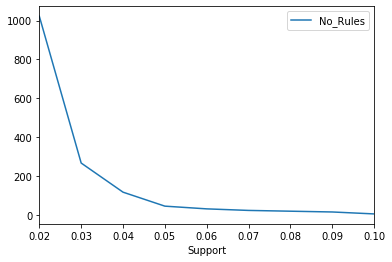

In [35]:
germany_rules = [association('ge',supvalue) for supvalue in support]
print(germany_rules)

germany_rules_vs_support = pd.DataFrame({'Support': support , 'No_Rules': germany_rules})
germany_rules_vs_support.plot('Support', 'No_Rules')

# 0.06 is good threshold

[6366, 1300, 394, 228, 142, 96, 58, 28, 16]


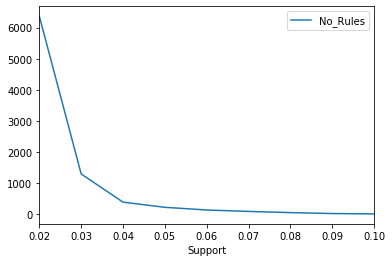

In [36]:
france_rules = [association('fr',supvalue) for supvalue in support]
print(france_rules)

france_rules_vs_support = pd.DataFrame({'Support': support , 'No_Rules': france_rules})
france_rules_vs_support.plot('Support', 'No_Rules')

# 0.08 seems to give 60 rules

[526, 526, 158, 72, 38]


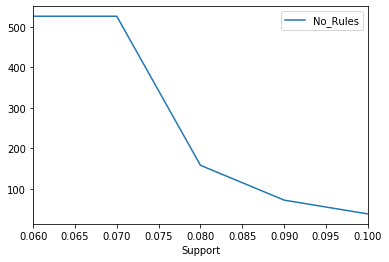

In [38]:
new_support = [0.06, 0.07,0.08,0.09,0.1]
switzerland_rules = [association('sw',supvalue) for supvalue in new_support]
print(switzerland_rules)

switzerland_rules_vs_support = pd.DataFrame({'Support': new_support , 'No_Rules': switzerland_rules})
switzerland_rules_vs_support.plot('Support', 'No_Rules')

# 0.09 seems to give 60 rules

[730070, 3718, 306, 122, 30, 24, 18, 8, 8]


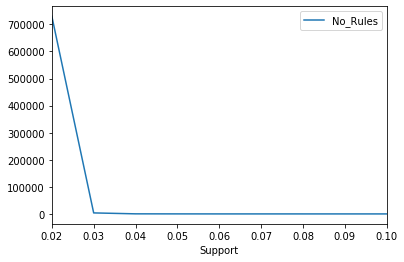

In [39]:
spain_rules = [association('sp',supvalue) for supvalue in support]
print(spain_rules)

spain_rules_vs_support = pd.DataFrame({'Support': support , 'No_Rules': spain_rules})
spain_rules_vs_support.plot('Support', 'No_Rules')

# 0.06 seems reasonable threshold

# Implementation of Word2Vec

In [104]:
product_stockcode = transaction_data_nonulls[['StockCode', 'Description']].drop_duplicates()
product_stockcode.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [117]:
stockcode = transaction_data_nonulls.groupby("InvoiceNo").apply(lambda order: order['Description'].tolist())
products_list =product_stockcode['Description'].tolist()

[list(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'])
 list(['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'])
 list(['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'])
 ... list(['Manual']) list(['VICTORIAN SEWING BOX LARGE'])
 list(['HANGING HEART JAR T-LIGHT HOLDER', '36 PENCILS TUBE RED RETROSPOT'])]


In [118]:
# The model would give the embedding of size = 5 i.e. coordinates of each word in a 5 dimensional space

# France
model = gensim.models.Word2Vec(stockcode.values, size=5, window=6, min_count=2, workers=4)
vocab = list(model.wv.vocab.keys())
# The coordinates of the product 'WHITE METAL LANTERN'
print(model['WHITE METAL LANTERN'])

[-1.5323678  1.8909388  1.9931293 -1.5447762  1.5230523]


C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [122]:
# Gives out the coo
X = model[model.wv.vocab]

C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


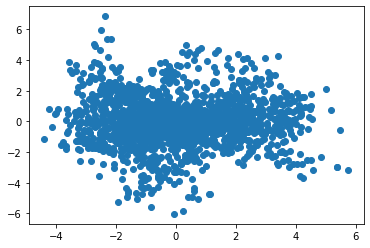

In [123]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])

# Recommendation Engine - Single Product

In [124]:
def similar_products(v, n = 5):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)
    return ms

In [126]:
recommendation_list = [similar_products(product) for product in vocab]

C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  after removing the cwd from sys.path.


# Recommendation Engine - Multiple Products

In [133]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [140]:
x  = aggregate_vectors(['HAND WARMER UNION JACK','HAND WARMER RED POLKA DOT'])

C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [141]:
similar_products(x)

C:\Users\Nidhi Patni\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  after removing the cwd from sys.path.


[('HAND WARMER UNION JACK', 0.991995632648468),
 ('HAND WARMER RED RETROSPOT', 0.9877634644508362),
 ('HAND WARMER BABUSHKA DESIGN', 0.9861494898796082),
 ('HAND WARMER SCOTTY DOG DESIGN', 0.9815213084220886),
 ('HAND WARMER RED LOVE HEART', 0.9786905646324158),
 ('HAND WARMER OWL DESIGN', 0.9718641042709351)]